# Import libraries

In [1]:
import pandas as pd
import numpy as np
from functions.model import *
from functions.vectorization import *
from functions.vocabulary import *
from functions.labelization import *

2023-10-09 11:12:02.001268: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-09 11:12:03.125814: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-09 11:12:03.125868: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-09 11:12:03.131494: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-09 11:12:03.757137: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-09 11:12:03.761022: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

# Define train query

In [2]:
train_query="SELECT"

# Import id->label

In [3]:
dict_label_ids = load_dict_label_ids('../data/train/ids_labels.json')

# Import vectors

In [4]:
path_df_train = '../data/test/test_palabras_nuevas.json'
path_new_model = '../model/my_model_V19.h5'
df_train = pd.read_json(path_df_train)
vectorized_dataframe = load_vectorized_dataframe('../data/train/df_train_vectorized.npy')
df_train.columns = map(str.upper, df_train.columns)
train_ids = df_train['ID_PUESTO_ESCO_ULL']

# Get input dimension of model

In [5]:
vocabulary = load_vocabulary('../data/train/vocabulary.json')
input_dimension = get_vocabulary_dimension(vocabulary)

# Get output dimension of the model

In [6]:
output_dimension = get_dict_dimension(dict_label_ids)

# Create CNN model

In [7]:
# model = create_rnn(input_dimension, output_dimension)
model = create_cnn(input_dimension, output_dimension)

# Train model

In [8]:
# Convert vectorized dataframe to np.vstack
vector_array = np.vstack(vectorized_dataframe)
train_labels_array = cast_id_to_labels(train_ids, dict_label_ids)

# Train model
model, history = model_train(model, train_query, vector_array, train_labels_array, epochs=10, batch_size=2, validation_split=0.2, verbose=1, balance_data=True)

# Save model
save_model(model, path_new_model)

: 

# Plot history

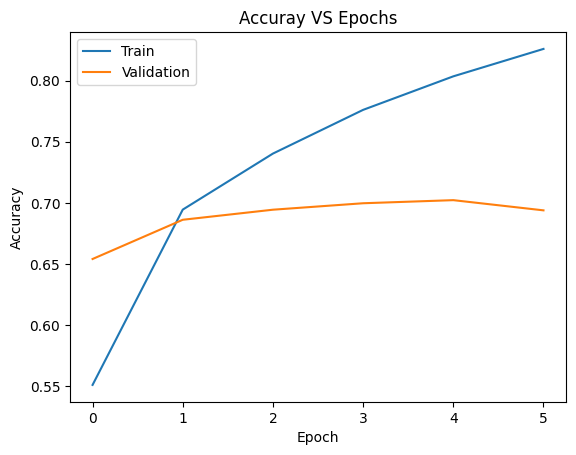

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuray VS Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Resume classificator

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1, 4562)           0         
                                                                 
 lstm (LSTM)                 (None, 64)                1184512   
                                                                 
 dense (Dense)               (None, 1016)              66040     
                                                                 
Total params: 1250552 (4.77 MB)
Trainable params: 1250552 (4.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
